In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np


Data Generation

In [8]:
x= np.arange(-80, 81, 0.5)
y= x**2 +5 *x +3
print('y_shape is {} \nx_shape is {}'.format(y.shape,x.shape))
print(f"y_shape is {y.shape} and x_shape is {x.shape}")

y_shape is (322,) 
x_shape is (322,)
y_shape is (322,) and x_shape is (322,)


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x,y , test_size=0.2)
x_train.shape , x_test.shape

((257,), (65,))

In [13]:
#model definition

In [17]:
model_1= keras.Sequential()
model_1.add(keras.layers.Dense(units=1024, activation='relu', input_shape=[1]))
model_1.add(keras.layers.Dense(units=1))
model_1.compile( optimizer='adam', loss='mean_squared_error')
model_1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1024)              2048      
                                                                 
 dense_7 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
hist_1= model_1.fit(x_train, y_train , batch_size=64, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
5/5 [==============================] - 0s 18ms/step - loss: 375966.2500 - val_loss: 414729.0000
Epoch 2/1000
5/5 [==============================] - 0s 8ms/step - loss: 375622.9062 - val_loss: 412833.2500
Epoch 3/1000
5/5 [==============================] - 0s 9ms/step - loss: 376059.7812 - val_loss: 409660.1562
Epoch 4/1000
5/5 [==============================] - 0s 8ms/step - loss: 372435.3125 - val_loss: 409248.7812
Epoch 5/1000
5/5 [==============================] - 0s 8ms/step - loss: 373083.6250 - val_loss: 408986.1562
Epoch 6/1000
5/5 [==============================] - 0s 8ms/step - loss: 373452.3750 - val_loss: 408696.2812
Epoch 7/1000
5/5 [==============================] - 0s 8ms/step - loss: 372695.8125 - val_loss: 409440.9688
Epoch 8/1000
5/5 [==============================] - 0s 10ms/step - loss: 375980.9062 - val_loss: 410138.8750
Epoch 9/1000
5/5 [==============================] - 0s 8ms/step - loss: 376530.2500 - val_loss: 409936.5000
Epoch 10/1000
5/5 [=======

KeyboardInterrupt: ignored

In [22]:
model_2= keras.Sequential()
model_2.add(keras.layers.Dense(units=256, activation='relu', input_shape=[1]))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=256, activation='relu'))
model_2.add(keras.layers.Dense(units=1))
model_2.compile( optimizer='adam', loss='mean_squared_error')
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 256)               512       
                                                                 
 dense_14 (Dense)            (None, 256)               65792     
                                                                 
 dense_15 (Dense)            (None, 256)               65792     
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 198145 (774.00 KB)
Trainable params: 198145 (774.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
hist_2= model_2.fit(x_train, y_train , batch_size=64, epochs=1000, validation_data=(x_test, y_test))

Epoch 1/1000
5/5 [==============================] - 2s 63ms/step - loss: 8544888.0000 - val_loss: 7824421.5000
Epoch 2/1000
5/5 [==============================] - 0s 16ms/step - loss: 8273412.5000 - val_loss: 7383231.5000
Epoch 3/1000
5/5 [==============================] - 0s 17ms/step - loss: 7635981.0000 - val_loss: 6349539.0000
Epoch 4/1000
5/5 [==============================] - 0s 17ms/step - loss: 6226139.0000 - val_loss: 4324229.0000
Epoch 5/1000
5/5 [==============================] - 0s 19ms/step - loss: 3821197.2500 - val_loss: 1632005.2500
Epoch 6/1000
5/5 [==============================] - 0s 20ms/step - loss: 1110194.3750 - val_loss: 886190.7500
Epoch 7/1000
5/5 [==============================] - 0s 19ms/step - loss: 1217144.3750 - val_loss: 1103717.2500
Epoch 8/1000
5/5 [==============================] - 0s 11ms/step - loss: 779933.4375 - val_loss: 641743.0625
Epoch 9/1000
5/5 [==============================] - 0s 10ms/step - loss: 680838.5625 - val_loss: 957129.3125
Epoch 

In [24]:
y_pred_1= model_1.predict(x_test)
y_pred_2= model_2.predict(x_test)

3/3 [==============================] - 0s 3ms/step


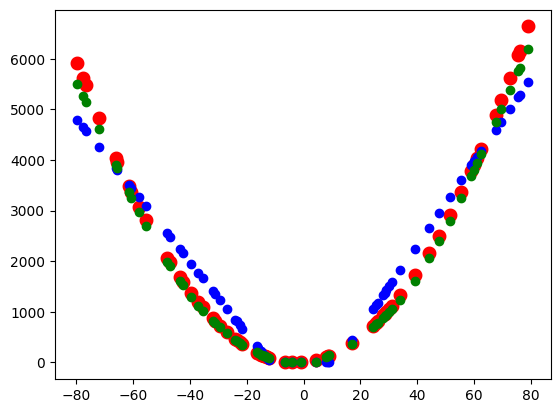

In [27]:
plt.scatter(x_test, y_test, color='red', linewidths=4 )
plt.scatter (x_test, y_pred_1 , color= 'blue')
plt.scatter (x_test, y_pred_2 , color= 'green')

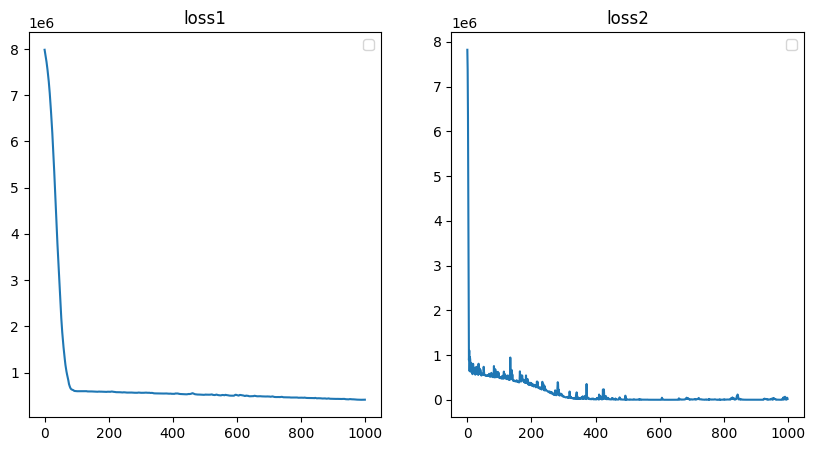

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(hist_1.history['val_loss'])
axes[0].set_title("loss1")
axes[0].legend()

axes[1].plot(hist_2.history['val_loss'])
axes[1].set_title("loss2")
axes[1].legend()
plt.show()


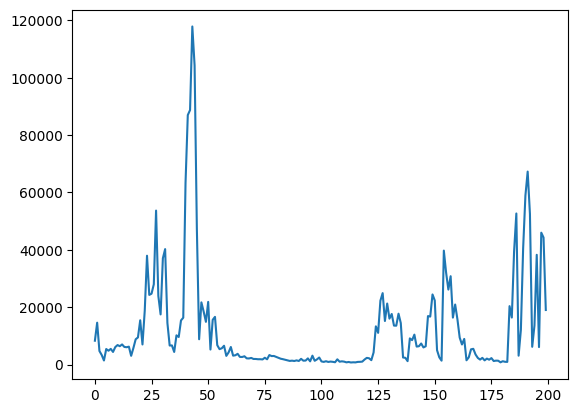

In [35]:
plt.plot(hist_2.history['val_loss'][800:])
plt.show()